<a href="https://colab.research.google.com/github/jh-4166640/Machine-Learning-Lecture/blob/main/Optimizer_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install pandas

In [164]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Normalization, Input, Dense

(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

In [165]:
model = keras.models.Sequential([

    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dense(units=32,activation='relu'),
    keras.layers.Dense(units=outputClass, activation='softmax')
])


normal **SGD** optimizer

In [128]:
optimizer=keras.optimizers.SGD(learning_rate=0.005,momentum=0.0)
figTitle = "Optimizer = Normal SGD(learning rate="+str(0.005)+")"

**Momentum** optimizer

In [143]:
momentum_val = 0.1
optimizer=keras.optimizers.SGD(learning_rate=0.005,momentum=momentum_val)
figTitle = "Optimizer = Momentum(momentum="+str(momentum_val)+")"

**NAG** optimizer

In [148]:
momentum_val = 0.9
optimizer=keras.optimizers.SGD(learning_rate=0.005,momentum=momentum_val,nesterov=True)
figTitle = "Optimizer = NAG(momentum="+str(momentum_val)+")"

**Adagrad** Optimizer

In [155]:
init_accmulator_val = 0.01
optimizer=keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=init_accmulator_val,epsilon=1e-07,)
figTitle = "Optimizer = Adagrad(initial_accumulator_value="+str(init_accmulator_val)+")"

**RMSProp** Optimizer

In [161]:
rho = 0.9
optimizer=keras.optimizers.RMSprop(learning_rate=0.001,rho=rho,epsilon=1e-07,centered=False)
figTitle = "Optimizer = RMSprop(rho="+str(rho)+")"

**Adam** Optimizer

In [166]:
momentum = 0.9
size = 0.999
optimizer=keras.optimizers.Adam(learning_rate=0.001,beta_1=momentum,beta_2=size,epsilon=1e-07,amsgrad=False)
figTitle = "Optimizer = Adam(beta_1="+str(momentum)+",beta_2="+str(size)+")"

In [162]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#history = model.fit(x_train, y_train,batch_size=32, epochs=30, validation_data=(x_test, y_test))
history = model.fit(
   x_train.reshape(-1, 28*28),
   y_train,
   batch_size=32,
   epochs=30,
   validation_data=(x_test.reshape(-1, 28*28), y_test)
)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8740 - loss: 0.4215 - val_accuracy: 0.9635 - val_loss: 0.1204
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9674 - loss: 0.1116 - val_accuracy: 0.9616 - val_loss: 0.1236
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0789 - val_accuracy: 0.9746 - val_loss: 0.0899
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9813 - loss: 0.0623 - val_accuracy: 0.9742 - val_loss: 0.0968
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9840 - loss: 0.0547 - val_accuracy: 0.9725 - val_loss: 0.1021
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9875 - loss: 0.0424 - val_accuracy: 0.9775 - val_loss: 0.1032
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9895 - loss: 0.0371 - val_accuracy: 0.9757 - val_loss: 0.1041
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0354 - 

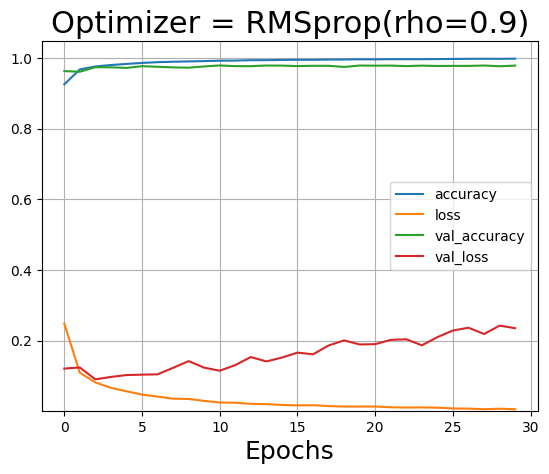

In [163]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0.001)
plt.title(figTitle,fontsize=22)
plt.xlabel('Epochs',fontsize=18)
plt.show()
